In [ ]:
import sys
import time
import warnings
from numba import jit
if not sys.warnoptions:
    warnings.simplefilter('ignore')

In [22]:
import tensorflow.compat.v1 as tf
tf.disable_v2_behavior()
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
from sklearn.preprocessing import MinMaxScaler
from datetime import datetime
from datetime import timedelta
from tqdm import tqdm
sns.set()

In [23]:
data_XLB=pd.read_csv("data/data_XLB.csv")
data_XLB=data_XLB.drop(['Unnamed: 0'], axis=1)
data_XLE=pd.read_csv("data/data_XLE.csv")
data_XLE=data_XLE.drop(['Unnamed: 0'], axis=1)
data_XLF=pd.read_csv("data/data_XLF.csv")
data_XLF=data_XLF.drop(['Unnamed: 0'], axis=1)
data_XLI=pd.read_csv("data/data_XLI.csv")
data_XLI=data_XLI.drop(['Unnamed: 0'], axis=1)
data_XLK=pd.read_csv("data/data_XLK.csv")
data_XLK=data_XLK.drop(['Unnamed: 0'], axis=1)
data_XLU=pd.read_csv("data/data_XLU.csv")
data_XLU=data_XLU.drop(['Unnamed: 0'], axis=1)
data_XLV=pd.read_csv("data/data_XLV.csv")
data_XLV=data_XLV.drop(['Unnamed: 0'], axis=1)
data_XLY=pd.read_csv("data/data_XLY.csv")
data_XLY=data_XLY.drop(['Unnamed: 0'], axis=1)

# Feed Forward Neural Network: 4 hidden layers and 15 features

### Evaluated model performance
### Run this final structure on standard DNN with 4 hidden layers

In [24]:
test_size=1000
#XLB_train = data_XLB.iloc[:-test_size,:]
XLB_train = data_XLB
XLB_test = data_XLB.iloc[-test_size:,:]
train_X_XLB=np.array(XLB_train.iloc[:,np.r_[1:7, 8:16]])
train_Y_XLB=XLB_train.iloc[:,7].values.reshape(XLB_train.shape[0],1)
test_X_XLB=XLB_test.iloc[:,np.r_[1:7, 8:16]]
test_Y_XLB=XLB_test.iloc[:,7].values.reshape(XLB_test.shape[0],1)
X_future_XLB=pd.read_csv("future/X_future_XLB.csv")
X_future_XLB=X_future_XLB.drop(['Unnamed: 0'],axis=1)

In [25]:
test_X_XLB

,GDP,FEDFUNDS,LIBOR,MORTGAGE30US,REAL_USER_COST,UNEMPLOYMENT_RT,XLE,XLF,XLI,XLK,XLU,XLV,XLY,GSPC
2578,0.607415,0.003091,0.008533,0.18961,0.746045,0.578125,0.774205,-0.045595,0.307768,0.270593,0.432394,0.382484,0.393190,0.404937
2579,0.607415,0.003091,0.008533,0.18961,0.746045,0.578125,0.774083,-0.045595,0.307522,0.270861,0.437626,0.382754,0.392544,0.404974
2580,0.607415,0.003091,0.008533,0.18961,0.746045,0.578125,0.785495,-0.043302,0.314394,0.275959,0.440241,0.386944,0.397342,0.411818
2581,0.607415,0.003091,0.008533,0.18961,0.746045,0.578125,0.785863,-0.040909,0.322494,0.278642,0.446076,0.391269,0.402602,0.416900
2582,0.607415,0.003091,0.008533,0.18961,0.746045,0.578125,0.793717,-0.040710,0.324825,0.276630,0.438632,0.395864,0.406662,0.419027
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3573,1.000000,0.363215,0.446146,0.00000,1.000000,0.000000,0.539330,0.092772,0.690637,0.870405,0.840644,0.908096,0.936514,0.911585
3574,1.000000,0.363215,0.446146,0.00000,1.000000,0.000000,0.539330,0.092036,0.689287,0.863429,0.839235,0.905528,0.932085,0.907984
3575,1.000000,0.363215,0.446146,0.00000,1.000000,0.000000,0.543011,0.094245,0.692968,0.866649,0.859759,0.905933,0.933653,0.912404
3576,1.000000,0.363215,0.446146,0.00000,1.000000,0.000000,0.529513,0.084428,0.666339,0.828146,0.872233,0.883363,0.901449,0.883632


In [26]:
#XLE_train = data_XLE.iloc[:-test_size,:]
XLE_train = data_XLE
XLE_test = data_XLE.iloc[-test_size:,:]
train_X_XLE=np.array(XLE_train.iloc[:,np.r_[1:8, 9:16]])
train_Y_XLE=XLE_train.iloc[:,8].values.reshape(XLE_train.shape[0],1)
test_X_XLE=XLE_test.iloc[:,np.r_[1:8, 9:16]]
test_Y_XLE=XLE_test.iloc[:,8].values.reshape(XLE_test.shape[0],1)
X_future_XLE=pd.read_csv("future/X_future_XLE.csv")
X_future_XLE=X_future_XLE.drop(['Unnamed: 0'],axis=1)

In [27]:
#XLF_train = data_XLF.iloc[:-test_size,:]
XLF_train = data_XLF
XLF_test = data_XLF.iloc[-test_size:,:]
train_X_XLF=np.array(XLF_train.iloc[:,np.r_[1:9, 10:16]])
train_Y_XLF=XLF_train.iloc[:,9].values.reshape(XLF_train.shape[0],1)
test_X_XLF=XLF_test.iloc[:,np.r_[1:9, 10:16]]
test_Y_XLF=XLF_test.iloc[:,9].values.reshape(XLF_test.shape[0],1)
X_future_XLF=pd.read_csv("future/X_future_XLF.csv")
X_future_XLF=X_future_XLF.drop(['Unnamed: 0'],axis=1)

In [28]:
#XLI_train = data_XLI.iloc[:-test_size,:]
XLI_train = data_XLI
XLI_test = data_XLI.iloc[-test_size:,:]
train_X_XLI=np.array(XLI_train.iloc[:,np.r_[1:10, 11:16]])
train_Y_XLI=XLI_train.iloc[:,10].values.reshape(XLI_train.shape[0],1)
test_X_XLI=XLI_test.iloc[:,np.r_[1:10, 11:16]]
test_Y_XLI=XLI_test.iloc[:,10].values.reshape(XLI_test.shape[0],1)
X_future_XLI=pd.read_csv("future/X_future_XLI.csv")
X_future_XLI=X_future_XLI.drop(['Unnamed: 0'],axis=1)

In [29]:
#XLK_train = data_XLK.iloc[:-test_size,:]
XLK_train = data_XLK
XLK_test = data_XLK.iloc[-test_size:,:]
train_X_XLK=np.array(XLK_train.iloc[:,np.r_[1:11, 12:16]])
train_Y_XLK=XLK_train.iloc[:,11].values.reshape(XLK_train.shape[0],1)
test_X_XLK=XLK_test.iloc[:,np.r_[1:11, 12:16]]
test_Y_XLK=XLK_test.iloc[:,11].values.reshape(XLK_test.shape[0],1)
X_future_XLK=pd.read_csv("future/X_future_XLK.csv")
X_future_XLK=X_future_XLK.drop(['Unnamed: 0'],axis=1)

In [30]:
#XLU_train = data_XLU.iloc[:-test_size,:]
XLU_train = data_XLU
XLU_test = data_XLU.iloc[-test_size:,:]
train_X_XLU=np.array(XLU_train.iloc[:,np.r_[1:12, 13:16]])
train_Y_XLU=XLU_train.iloc[:,12].values.reshape(XLU_train.shape[0],1)
test_X_XLU=XLU_test.iloc[:,np.r_[1:12, 13:16]]
test_Y_XLU=XLU_test.iloc[:,12].values.reshape(XLU_test.shape[0],1)
X_future_XLU=pd.read_csv("future/X_future_XLU.csv")
X_future_XLU=X_future_XLU.drop(['Unnamed: 0'],axis=1)

In [31]:
#XLV_train = data_XLV.iloc[:-test_size,:]
XLV_train = data_XLV
XLV_test = data_XLV.iloc[-test_size:,:]
train_X_XLV=np.array(XLV_train.iloc[:,np.r_[1:13, 14:16]])
train_Y_XLV=XLV_train.iloc[:,13].values.reshape(XLV_train.shape[0],1)
test_X_XLV=XLV_test.iloc[:,np.r_[1:13, 14:16]]
test_Y_XLV=XLV_test.iloc[:,13].values.reshape(XLV_test.shape[0],1)
X_future_XLV=pd.read_csv("future/X_future_XLV.csv")
X_future_XLV=X_future_XLV.drop(['Unnamed: 0'],axis=1)

In [32]:
#XLY_train = data_XLY.iloc[:-test_size,:]
XLY_train = data_XLY
XLY_test = data_XLY.iloc[-test_size:,:]
train_X_XLY=np.array(XLY_train.iloc[:,np.r_[1:14, 15:16]])
train_Y_XLY=XLY_train.iloc[:,14].values.reshape(XLY_train.shape[0],1)
test_X_XLY=XLY_test.iloc[:,np.r_[1:14, 15:16]]
test_Y_XLY=XLY_test.iloc[:,14].values.reshape(XLY_test.shape[0],1)
X_future_XLY=pd.read_csv("future/X_future_XLY.csv")
X_future_XLY=X_future_XLY.drop(['Unnamed: 0'],axis=1)

## 4 Hidden layers

In [33]:
def neural_net_model(X_data,input_dim):
    W_1 = tf.Variable(tf.random_uniform([input_dim,10]))
    b_1 = tf.Variable(tf.zeros([10]))
    layer_1 = tf.add(tf.matmul(X_data,W_1), b_1)
    layer_1 = tf.nn.relu(layer_1)

    W_2 = tf.Variable(tf.random_uniform([10,10]))
    b_2 = tf.Variable(tf.zeros([10]))
    layer_2 = tf.add(tf.matmul(layer_1,W_2), b_2)
    layer_2 = tf.nn.relu(layer_2)

    W_3 = tf.Variable(tf.random_uniform([10,20]))
    b_3 = tf.Variable(tf.zeros([20]))
    layer_3 = tf.add(tf.matmul(layer_2,W_3), b_3)
    layer_3 = tf.nn.relu(layer_3)
    
    W_4 = tf.Variable(tf.random_uniform([20,30]))
    b_4 = tf.Variable(tf.zeros([30]))
    layer_4 = tf.add(tf.matmul(layer_3,W_4), b_4)
    layer_4 = tf.nn.relu(layer_4)

    W_O = tf.Variable(tf.random_uniform([10,1]))
    b_O = tf.Variable(tf.zeros([1]))
    output = tf.add(tf.matmul(layer_2,W_O), b_O)

    return output

In [34]:
def model(sector):
    xs = tf.placeholder(tf.float32)
    ys = tf.placeholder(tf.float32)
    output = neural_net_model(xs,14)
    cost = tf.reduce_mean(tf.square(output-ys))
    train = tf.train.AdamOptimizer(0.001).minimize(cost)
    with tf.Session() as sess:
        # Initiate session and initialize all vaiables
        sess.run(tf.global_variables_initializer())
        saver = tf.train.Saver()
        c_t=[]
        c_test=[]
        for i in range(20):
            for j in range(train_X_XLB.shape[0]):
                if sector=="XLB":
                    sess.run([cost,train],feed_dict={xs:train_X_XLB[j,:].reshape(1,14), ys:train_Y_XLB[j]})
                if sector=="XLE":
                    sess.run([cost,train],feed_dict={xs:train_X_XLE[j,:].reshape(1,14), ys:train_Y_XLE[j]})
                if sector=="XLF":
                    sess.run([cost,train],feed_dict={xs:train_X_XLF[j,:].reshape(1,14), ys:train_Y_XLF[j]})
                if sector=="XLI":
                    sess.run([cost,train],feed_dict={xs:train_X_XLI[j,:].reshape(1,14), ys:train_Y_XLI[j]})
                if sector=="XLK":
                    sess.run([cost,train],feed_dict={xs:train_X_XLK[j,:].reshape(1,14), ys:train_Y_XLK[j]})
                if sector=="XLU":
                    sess.run([cost,train],feed_dict={xs:train_X_XLU[j,:].reshape(1,14), ys:train_Y_XLU[j]})
                if sector=="XLV":
                    sess.run([cost,train],feed_dict={xs:train_X_XLV[j,:].reshape(1,14), ys:train_Y_XLV[j]})
                if sector=="XLY":
                    sess.run([cost,train],feed_dict={xs:train_X_XLY[j,:].reshape(1,14), ys:train_Y_XLY[j]})
                # Run cost and train with each sample
            if sector=="XLB":
                c_t.append(sess.run(cost, feed_dict={xs:train_X_XLB,ys:train_X_XLB}))
                c_test.append(sess.run(cost, feed_dict={xs:test_X_XLB,ys:test_Y_XLB}))
                print('Epoch :',i,'Cost :',c_t[i])
            if sector=="XLE":
                c_t.append(sess.run(cost, feed_dict={xs:train_X_XLE,ys:train_X_XLE}))
                c_test.append(sess.run(cost, feed_dict={xs:test_X_XLE,ys:test_Y_XLE}))
                print('Epoch :',i,'Cost :',c_t[i])
            if sector=="XLF":
                c_t.append(sess.run(cost, feed_dict={xs:train_X_XLB,ys:train_X_XLB}))
                c_test.append(sess.run(cost, feed_dict={xs:test_X_XLB,ys:test_Y_XLB}))
                print('Epoch :',i,'Cost :',c_t[i])
            if sector=="XLI":
                c_t.append(sess.run(cost, feed_dict={xs:train_X_XLI,ys:train_X_XLI}))
                c_test.append(sess.run(cost, feed_dict={xs:test_X_XLI,ys:test_Y_XLI}))
                print('Epoch :',i,'Cost :',c_t[i])
            if sector=="XLK":
                c_t.append(sess.run(cost, feed_dict={xs:train_X_XLK,ys:train_X_XLK}))
                c_test.append(sess.run(cost, feed_dict={xs:test_X_XLK,ys:test_Y_XLK}))
                print('Epoch :',i,'Cost :',c_t[i])
            if sector=="XLU":
                c_t.append(sess.run(cost, feed_dict={xs:train_X_XLU,ys:train_X_XLU}))
                c_test.append(sess.run(cost, feed_dict={xs:test_X_XLU,ys:test_Y_XLU}))
                print('Epoch :',i,'Cost :',c_t[i])
            if sector=="XLV":
                c_t.append(sess.run(cost, feed_dict={xs:train_X_XLV,ys:train_X_XLV}))
                c_test.append(sess.run(cost, feed_dict={xs:test_X_XLV,ys:test_Y_XLV}))
                print('Epoch :',i,'Cost :',c_t[i])
            if sector=="XLY":
                c_t.append(sess.run(cost, feed_dict={xs:train_X_XLY,ys:train_X_XLY}))
                c_test.append(sess.run(cost, feed_dict={xs:test_X_XLY,ys:test_Y_XLY}))
                print('Epoch :',i,'Cost :',c_t[i])
        if sector=="XLB":
            pred = sess.run(output, feed_dict={xs:test_X_XLB})
            pred2 = sess.run(output, feed_dict={xs:X_future_XLB})
            print('Cost :',sess.run(cost, feed_dict={xs:test_X_XLB,ys:test_Y_XLB}))
            #plt.plot(range(test_Y_XLB.shape[0]),test_Y_XLB,label="Original Data")
            plt.plot(range(X_future_XLB.shape[0]),pred2,label="Predicted")
            plt.legend()
            plt.ylabel('Stock Returns')
            plt.xlabel('Days')
            plt.show()
        if sector=="XLE":
            pred = sess.run(output, feed_dict={xs:test_X_XLE})
            pred2 = sess.run(output, feed_dict={xs:X_future_XLE})
            print('Cost :',sess.run(cost, feed_dict={xs:test_X_XLE,ys:test_Y_XLE}))
            #plt.plot(range(test_Y_XLE.shape[0]),test_Y_XLE,label="Original Data")
            plt.plot(range(X_future_XLE.shape[0]),pred2,label="Predicted")
            plt.legend()
            plt.ylabel('Stock Returns')
            plt.xlabel('Days')
            plt.show()
        if sector=="XLF":
            pred = sess.run(output, feed_dict={xs:test_X_XLF})
            pred2 = sess.run(output, feed_dict={xs:X_future_XLF})
            print('Cost :',sess.run(cost, feed_dict={xs:test_X_XLF,ys:test_Y_XLF}))
            #plt.plot(range(test_Y_XLF.shape[0]),test_Y_XLF,label="Original Data")
            plt.plot(range(X_future_XLF.shape[0]),pred2,label="Predicted")
            plt.legend()
            plt.ylabel('Stock Returns')
            plt.xlabel('Days')
            plt.show()
        if sector=="XLI":
            pred = sess.run(output, feed_dict={xs:test_X_XLI})
            pred2 = sess.run(output, feed_dict={xs:X_future_XLI})
            print('Cost :',sess.run(cost, feed_dict={xs:test_X_XLI,ys:test_Y_XLI}))
            #plt.plot(range(test_Y_XLI.shape[0]),test_Y_XLI,label="Original Data")
            plt.plot(range(X_future_XLI.shape[0]),pred2,label="Predicted")
            plt.legend()
            plt.ylabel('Stock Returns')
            plt.xlabel('Days')
            plt.show()
        if sector=="XLK":
            pred = sess.run(output, feed_dict={xs:test_X_XLI})
            pred2 = sess.run(output, feed_dict={xs:X_future_XLK})
            print('Cost :',sess.run(cost, feed_dict={xs:test_X_XLK,ys:test_Y_XLK}))
            #plt.plot(range(test_Y_XLK.shape[0]),test_Y_XLK,label="Original Data")
            plt.plot(range(X_future_XLK.shape[0]),pred2,label="Predicted")
            plt.legend()
            plt.ylabel('Stock Returns')
            plt.xlabel('Days')
            plt.show()
        if sector=="XLU":
            pred = sess.run(output, feed_dict={xs:test_X_XLU})
            pred2 = sess.run(output, feed_dict={xs:X_future_XLU})
            print('Cost :',sess.run(cost, feed_dict={xs:test_X_XLU,ys:test_Y_XLU}))
            #plt.plot(range(test_Y_XLU.shape[0]),test_Y_XLU,label="Original Data")
            plt.plot(range(X_future_XLU.shape[0]),pred2,label="Predicted")
            plt.legend()
            plt.ylabel('Stock Returns')
            plt.xlabel('Days')
            plt.show()
        if sector=="XLV":
            pred = sess.run(output, feed_dict={xs:test_X_XLU})
            pred2 = sess.run(output, feed_dict={xs:X_future_XLV})
            print('Cost :',sess.run(cost, feed_dict={xs:test_X_XLV,ys:test_Y_XLV}))
            #plt.plot(range(test_Y_XLV.shape[0]),test_Y_XLV,label="Original Data")
            plt.plot(range(X_future_XLV.shape[0]),pred2,label="Predicted")
            plt.legend()
            plt.ylabel('Stock Returns')
            plt.xlabel('Days')
            plt.show()
        if sector=="XLY":
            pred = sess.run(output, feed_dict={xs:test_X_XLY})
            pred2 = sess.run(output, feed_dict={xs:X_future_XLY})
            print('Cost :',sess.run(cost, feed_dict={xs:test_X_XLY,ys:test_Y_XLY}))
            #plt.plot(range(test_Y_XLY.shape[0]),test_Y_XLY,label="Original Data")
            plt.plot(range(X_future_XLY.shape[0]),pred2,label="Predicted")
            plt.legend()
            plt.ylabel('Stock Returns')
            plt.xlabel('Days')
            plt.show()
            #print(c_t)
    return (c_t[-1],pred2)


# These are daily returns or stock price itself?
## If daily returns then just sumply take the sum of each and look going forwared

In [35]:
#xlb, xle, xlf, xli, xlk, xlu, xlv, xly

In [36]:
sectors = ['XLB', 'XLE', 'XLF', 'XLI', 'XLK', 'XLU', 'XLV', 'XLY']

# Ranking of sector outputs

In [37]:
def run_all_models():
    sectors = ['XLB', 'XLE', 'XLF', 'XLI', 'XLK', 'XLU', 'XLV', 'XLY']
    models_l = list()
    for sector in sectors:
        print('Starting model for: ', sector)
        temp_output = model(sector)
        output_2=[temp_output[0]]+temp_output[1].reshape(1,125).tolist()[0]
        models_l.append(output_2)
    return models_l


def sector_rank(models):
    #models is a list of lists
    #for each sector in the list, it is the daily close prices
    #position 0 = the close of last day real data
    #position 250? will be 1 years out forcast
    # position -1 will be 2 years out forcast
    sectors = ['XLB', 'XLE', 'XLF', 'XLI', 'XLK', 'XLU', 'XLV', 'XLY']
    sec_returns_l = list()
    for i in range(len(models)):
        #year 1 return calculation
        y1_temp = models[i]
        sec_returns_l.append(y1_temp)
        
    return sec_returns_l
        
#     #turn each into a dataframe
#     returns_df = pd.DataFrame({'sector':sectors, 'returns':sec_returns_l})
#     #sort
#     returns_df_sorted = year_1.sort_values(by='returns', ascending = False)
#     print('Reccomended investments for exit in 1 years time...')
#     print(returns_df_sorted)
#     return returns_df_sorted

### Need Ending value of stock price to calculate off of

Starting model for:  XLB
Epoch : 0 Cost : 0.26145226
Epoch : 1 Cost : 0.17440881
Epoch : 2 Cost : 0.11838743
Epoch : 3 Cost : 0.10261198
Epoch : 4 Cost : 0.09734689
Epoch : 5 Cost : 0.12539162
Epoch : 6 Cost : 0.10829511
Epoch : 7 Cost : 0.12954134
Epoch : 8 Cost : 0.15284392
Epoch : 9 Cost : 0.17006727
Epoch : 10 Cost : 0.23219045
Epoch : 11 Cost : 0.2145038
Epoch : 12 Cost : 0.19573887
Epoch : 13 Cost : 0.18926843
Epoch : 14 Cost : 0.18416026
Epoch : 15 Cost : 0.17756274
Epoch : 16 Cost : 0.17029545
Epoch : 17 Cost : 0.16560753
Epoch : 18 Cost : 0.16283244
Epoch : 19 Cost : 0.1590479
Cost : 0.006782781


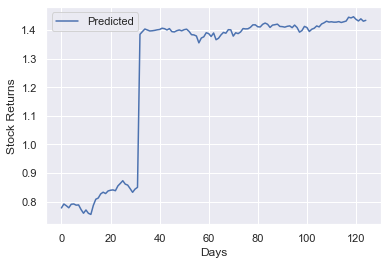

Starting model for:  XLE
Epoch : 0 Cost : 1.7785577
Epoch : 1 Cost : 0.82210803
Epoch : 2 Cost : 0.4905706
Epoch : 3 Cost : 0.30792314
Epoch : 4 Cost : 0.15726069
Epoch : 5 Cost : 0.15718463
Epoch : 6 Cost : 0.16881695
Epoch : 7 Cost : 0.17839094
Epoch : 8 Cost : 0.15755567
Epoch : 9 Cost : 0.12630437
Epoch : 10 Cost : 0.13401261
Epoch : 11 Cost : 0.111087516
Epoch : 12 Cost : 0.11486716
Epoch : 13 Cost : 0.12964465
Epoch : 14 Cost : 0.12765236
Epoch : 15 Cost : 0.13687846
Epoch : 16 Cost : 0.1425629
Epoch : 17 Cost : 0.117027424
Epoch : 18 Cost : 0.106671944
Epoch : 19 Cost : 0.10528674
Cost : 0.022909272


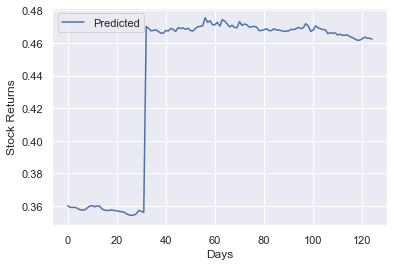

Starting model for:  XLF
Epoch : 0 Cost : 2.2543385
Epoch : 1 Cost : 0.5807521
Epoch : 2 Cost : 0.21671857
Epoch : 3 Cost : 0.14387731
Epoch : 4 Cost : 0.1438394
Epoch : 5 Cost : 0.14594385
Epoch : 6 Cost : 0.14513434
Epoch : 7 Cost : 0.15277411
Epoch : 8 Cost : 0.15946725
Epoch : 9 Cost : 0.1399933
Epoch : 10 Cost : 0.1408095
Epoch : 11 Cost : 0.14214385
Epoch : 12 Cost : 0.14057764
Epoch : 13 Cost : 0.14029083
Epoch : 14 Cost : 0.13808574
Epoch : 15 Cost : 0.13789368
Epoch : 16 Cost : 0.13760933
Epoch : 17 Cost : 0.1366438
Epoch : 18 Cost : 0.1372597
Epoch : 19 Cost : 0.13514724
Cost : 0.0072004246


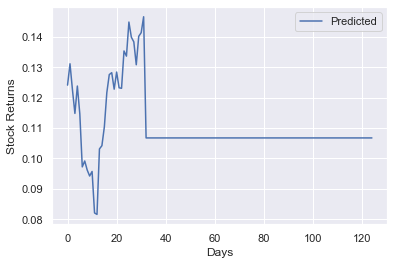

Starting model for:  XLI
Epoch : 0 Cost : 2.241122
Epoch : 1 Cost : 0.16176675
Epoch : 2 Cost : 0.1272046
Epoch : 3 Cost : 0.20413007
Epoch : 4 Cost : 0.2066975
Epoch : 5 Cost : 0.20992579
Epoch : 6 Cost : 0.20989415
Epoch : 7 Cost : 0.20989095
Epoch : 8 Cost : 0.20989062
Epoch : 9 Cost : 0.20989063
Epoch : 10 Cost : 0.20989063
Epoch : 11 Cost : 0.20989063
Epoch : 12 Cost : 0.20989063
Epoch : 13 Cost : 0.20989063
Epoch : 14 Cost : 0.20989063
Epoch : 15 Cost : 0.20989063
Epoch : 16 Cost : 0.20989063
Epoch : 17 Cost : 0.20989063
Epoch : 18 Cost : 0.20989063
Epoch : 19 Cost : 0.20989063
Cost : 0.04030256


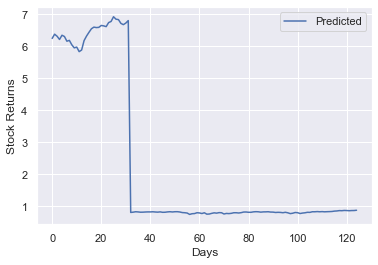

Starting model for:  XLK
Epoch : 0 Cost : 0.7270293
Epoch : 1 Cost : 0.4263354
Epoch : 2 Cost : 0.3189124
Epoch : 3 Cost : 0.1849672
Epoch : 4 Cost : 0.106948465
Epoch : 5 Cost : 0.104208045
Epoch : 6 Cost : 0.11561839
Epoch : 7 Cost : 0.123285234
Epoch : 8 Cost : 0.15532564
Epoch : 9 Cost : 0.28092805
Epoch : 10 Cost : 0.30764535
Epoch : 11 Cost : 0.28150347
Epoch : 12 Cost : 0.23787418
Epoch : 13 Cost : 0.1948717
Epoch : 14 Cost : 0.15909488
Epoch : 15 Cost : 0.13155316
Epoch : 16 Cost : 0.11725775
Epoch : 17 Cost : 0.113616295
Epoch : 18 Cost : 0.1092681
Epoch : 19 Cost : 0.10662227
Cost : 0.050894275


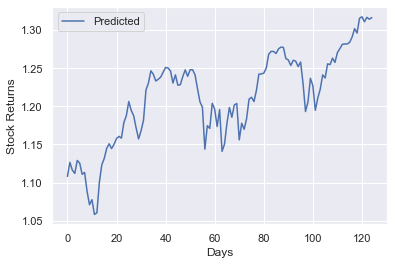

Starting model for:  XLU
Epoch : 0 Cost : 0.64614713
Epoch : 1 Cost : 0.35437545
Epoch : 2 Cost : 0.2148791
Epoch : 3 Cost : 0.19788519
Epoch : 4 Cost : 0.10157808
Epoch : 5 Cost : 0.10639017
Epoch : 6 Cost : 0.121118724
Epoch : 7 Cost : 0.1422453
Epoch : 8 Cost : 0.15605663
Epoch : 9 Cost : 0.16629422
Epoch : 10 Cost : 0.17288658
Epoch : 11 Cost : 0.1754972
Epoch : 12 Cost : 0.17113967
Epoch : 13 Cost : 0.16846028
Epoch : 14 Cost : 0.15973392
Epoch : 15 Cost : 0.16454528
Epoch : 16 Cost : 0.16321433
Epoch : 17 Cost : 0.16017239
Epoch : 18 Cost : 0.15596907
Epoch : 19 Cost : 0.14813575
Cost : 0.02301619


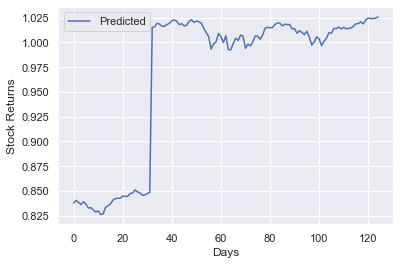

Starting model for:  XLV
Epoch : 0 Cost : 6.477268
Epoch : 1 Cost : 0.31141266
Epoch : 2 Cost : 0.28244758
Epoch : 3 Cost : 0.38439974
Epoch : 4 Cost : 0.38571155
Epoch : 5 Cost : 0.27640358
Epoch : 6 Cost : 0.2862815
Epoch : 7 Cost : 0.2251309
Epoch : 8 Cost : 0.18530685
Epoch : 9 Cost : 0.1580105
Epoch : 10 Cost : 0.1425315
Epoch : 11 Cost : 0.15786864
Epoch : 12 Cost : 0.14244153
Epoch : 13 Cost : 0.13647659
Epoch : 14 Cost : 0.13688497
Epoch : 15 Cost : 0.15039498
Epoch : 16 Cost : 0.13411126
Epoch : 17 Cost : 0.13059601
Epoch : 18 Cost : 0.1325311
Epoch : 19 Cost : 0.14299804
Cost : 0.022789747


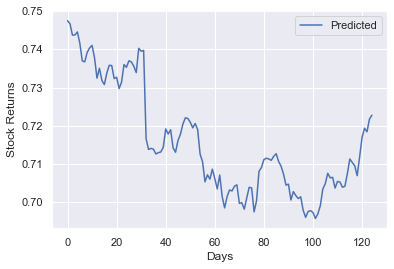

Starting model for:  XLY
Epoch : 0 Cost : 3.3872118
Epoch : 1 Cost : 0.64255536
Epoch : 2 Cost : 0.2787622
Epoch : 3 Cost : 0.21850047
Epoch : 4 Cost : 0.18961848
Epoch : 5 Cost : 0.12578379
Epoch : 6 Cost : 0.12682936
Epoch : 7 Cost : 0.120828435
Epoch : 8 Cost : 0.121780686
Epoch : 9 Cost : 0.11565569
Epoch : 10 Cost : 0.11224521
Epoch : 11 Cost : 0.11536946
Epoch : 12 Cost : 0.118201554
Epoch : 13 Cost : 0.11085977
Epoch : 14 Cost : 0.11095493
Epoch : 15 Cost : 0.11193371
Epoch : 16 Cost : 0.10870887
Epoch : 17 Cost : 0.10516037
Epoch : 18 Cost : 0.10471548
Epoch : 19 Cost : 0.10703142
Cost : 0.012768362


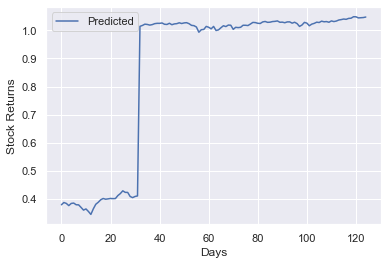

In [38]:
returns_list = sector_rank(run_all_models())

In [60]:
def end_rank_log(output):
    sectors = ['XLB', 'XLE', 'XLF', 'XLI', 'XLK', 'XLU', 'XLV', 'XLY']
    sector_names = ['Materials', 'Energy', 'Financials', 'Industrials', 'Technology',
                   'Utilities', 'Health Care', 'Consumer Discretionary']
    output_l = list()
    for item in output:
        val = sum(item)
        output_l.append((val))
            
    #turn each into a dataframe
    returns_df = pd.DataFrame({'sector': sector_names, 'sector_symbol':sectors, 'sum log(% returns)':output_l})
    #sort
    returns_df_sorted = returns_df.sort_values(by='sum log(% returns)', ascending = False).reset_index(drop=True)
    print('Reccomended investments in ', returns_df_sorted.iloc[0,0], 'sector')
    print(returns_df_sorted)
    return returns_df_sorted

In [61]:
lg_output = end_rank_log(returns_list)

Reccomended investments in  Industrials sector
                   sector sector_symbol  sum log(% returns)
0             Industrials           XLI          282.578377
1               Materials           XLB          156.990133
2              Technology           XLK          151.560287
3               Utilities           XLU          121.145701
4  Consumer Discretionary           XLY          107.900544
5             Health Care           XLV           89.616130
6                  Energy           XLE           55.097849
7              Financials           XLF           13.886687


In [62]:
lg_output

,sector,sector_symbol,sum log(% returns)
0,Industrials,XLI,282.578377
1,Materials,XLB,156.990133
2,Technology,XLK,151.560287
3,Utilities,XLU,121.145701
4,Consumer Discretionary,XLY,107.900544
5,Health Care,XLV,89.616130
6,Energy,XLE,55.097849
7,Financials,XLF,13.886687
